In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
con = sqlite3.connect(r'C:\Users\user\OneDrive\Desktop\Portfolio\Python\Amazon Customers Data Analysis/database.sqlite')

In [3]:
type(con)

sqlite3.Connection

In [4]:
df = pd.read_sql_query('SELECT * FROM Reviews', con)

In [5]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


---

In [7]:
#Perform Sentiment analysis on data

In [8]:
from textblob import TextBlob

In [9]:
text = df['Summary'][0]
text

'Good Quality Dog Food'

In [10]:
TextBlob(text).sentiment.polarity

0.7

In [11]:
polarity = []

for i in df['Summary']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [12]:
len(polarity)

568454

In [13]:
data=df.copy()

In [14]:
data['Polarity']=polarity

In [15]:
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Polarity  
0       0.7  
1       0.0  
2       0.0  
3       0.0  
4       0.8

In [16]:
#Perform EDA for the postive sentences

In [17]:
data_positive = data[data['Polarity']>0]

In [18]:
data_positive.shape

(331665, 11)

In [19]:
from wordcloud import WordCloud, STOPWORDS

In [20]:
stopwords = set(STOPWORDS)

In [21]:
data_positive.head()

Id   ProductId          UserId                    ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                     delmartian   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T  Michael D. Bigham "M. Wassir"   
5   6  B006K2ZZ7K   ADT0SRK1MGOEU                 Twoapennything   
6   7  B006K2ZZ7K  A1SP2KVKFXXRU1              David C. Sullivan   
7   8  B006K2ZZ7K  A3JRGQVEQN31IQ             Pamela G. Williams   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
4                     0                       0      5  1350777600   
5                     0                       0      4  1342051200   
6                     0                       0      5  1340150400   
7                     0                       0      5  1336003200   

                                         Summary  \
0                          Good Quality Dog Food   
4                                    Great taffy   
5                                     Nice Taffy   
6  Great!  Just as good as the expensive brands!   
7                         Wonderful, tasty taffy   

                                                Text  Polarity  
0  I have bought several of the Vitality canned d...  0.700000  
4  Great taffy at a great price.  There was a wid...  0.800000  
5  I got a wild hair for taffy and ordered this f...  0.600000  
6  This saltwater taffy had great flavors and was...  0.358333  
7  This taffy is so good.  It is very soft and ch...  1.000000

In [22]:
total_text=(' '.join(data_positive['Summary']))

In [23]:
len(total_text)

8465012

In [24]:
total_text[0:10000]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [25]:
import re
total_text = re.sub('[^a-zA-Z]', ' ', total_text)

In [26]:
total_text[0:10000]

'Good Quality Dog Food Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Love it  GREAT SWEET CANDY  Always fresh Delicious product  Great Bargain for the Price The Best Hot Sauce in the World Great machine  Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry  satisfying Love Gluten Free Oatmeal    GOOD WAY TO START THE DAY     Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns  Tastes great  Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT   And good   Came back for more     Roasts up a smooth brew Our guests love it  Awesome Deal  Awsome   Kids in neighborhood loved us  great deal  Better price for this at Target great source of electrolytes Great for preventing cramps Tast

In [27]:
total_text = re.sub(' +', ' ', total_text)

In [28]:
total_text[0:10000]

'Good Quality Dog Food Great taffy Nice Taffy Great Just as good as the expensive brands Wonderful tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this diet food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy Love it GREAT SWEET CANDY Always fresh Delicious product Great Bargain for the Price The Best Hot Sauce in the World Great machine Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry satisfying Love Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns Tastes great Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT And good Came back for more Roasts up a smooth brew Our guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Target great source of electrolytes Great for preventing cramps Taste is not so good How much would you

(-0.5, 999.5, 499.5, -0.5)

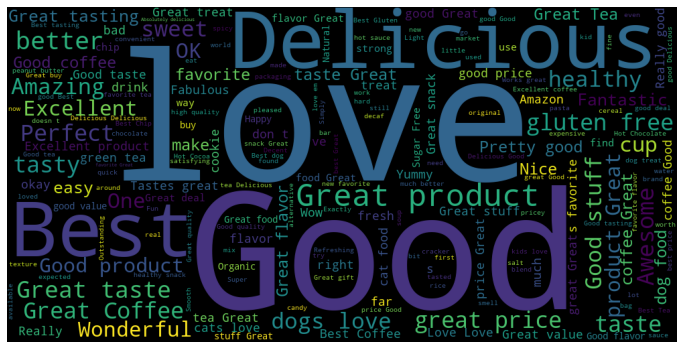

In [29]:
wordcloud = WordCloud(width=1000, height=500, stopwords = stopwords).generate(total_text)
plt.figure(figsize = (12,8))
plt.imshow(wordcloud)
plt.axis('off')

In [30]:
#Perform EDA for the negative sentences

In [31]:
data_negative = data[data['Polarity']<0]

In [32]:
data_negative.head()

Id   ProductId          UserId     ProfileName  HelpfulnessNumerator  \
16  17  B001GVISJM  A3KLWF6WQ5BNYO  Erica Neathery                     0   
26  27  B001GVISJM  A3RXAU2N8KV45G          lady21                     0   
57  58  B004N5KULM   ASCNNAJU6SXF8         S. Beck                     1   
61  62  B004N5KULM   A7ZK2A3VIW7X9           Peggy                     0   
62  63  B001EO5TPM  A1E09XGZUR78C6   gary sturrock                     2   

    HelpfulnessDenominator  Score        Time                Summary  \
16                       0      2  1348099200             poor taste   
26                       1      1  1332633600        Nasty No flavor   
57                       1      5  1336176000  How can you go wrong!   
61                       2      5  1319414400       pretty expensive   
62                       2      1  1215302400         stale product.   

                                                 Text  Polarity  
16  I love eating them and they are good for watch...    -0.400  
26  The candy is just red , No flavor . Just  plan...    -1.000  
57  It is chocolate, what can I say.  Great variet...    -0.625  
61  This bag of candy online is pretty expensive, ...    -0.125  
62  Arrived in 6 days and were so stale i could no...    -0.500

In [33]:
total_text2=(' '.join(data_negative['Summary']))

In [34]:
total_text2 = re.sub('[^a-zA-Z]', ' ', total_text2)

In [35]:
total_text = re.sub(' +', ' ', total_text)

(-0.5, 999.5, 499.5, -0.5)

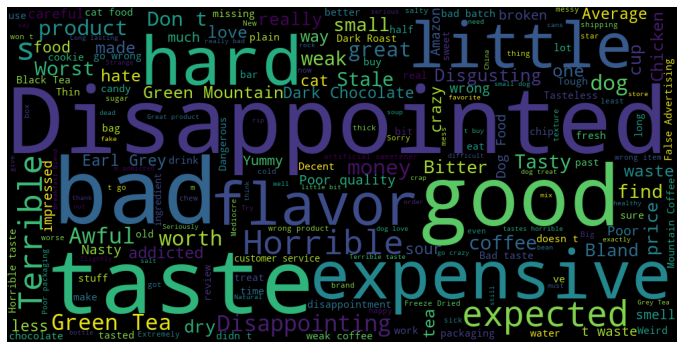

In [36]:
wordcloud2 = WordCloud(width=1000, height=500, stopwords = stopwords).generate(total_text2)
plt.figure(figsize = (12,8))
plt.imshow(wordcloud2)
plt.axis('off')

---

In [37]:
#Analyse, to that User Amazon can recommend more products?

In [38]:
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Polarity  
0       0.7  
1       0.0  
2       0.0  
3       0.0  
4       0.8

In [39]:
data['UserId'].nunique()

256059

In [40]:
raw = data.groupby('UserId').agg({'Summary': 'count', 'Text': 'count', 'Score': 'mean', 'ProductId' : 'count'}).sort_values(by = 'Text', ascending = False)

In [41]:
raw

Summary  Text     Score  ProductId
UserId                                            
A3OXHLG6DIBRW8      448   448  4.535714        448
A1YUL9PCJR3JTY      421   421  4.494062        421
AY12DBB0U420B       389   389  4.647815        389
A281NPSIMI1C2R      365   365  4.841096        365
A1Z54EM24Y40LL      256   256  4.453125        256
...                 ...   ...       ...        ...
A2HROKQO0GA5AF        1     1  3.000000          1
A2HROR28DMJV2W        1     1  5.000000          1
A2HRR8CO2Y20G8        1     1  5.000000          1
A2HRSML93IK9TR        1     1  5.000000          1
AZZZOVIBXHGDR         1     1  2.000000          1

[256059 rows x 4 columns]

In [42]:
raw.columns=['no_of_summaries', 'no_of_text', 'AVG_score', 'no_of_products_purchased']
raw

no_of_summaries  no_of_text  AVG_score  \
UserId                                                   
A3OXHLG6DIBRW8              448         448   4.535714   
A1YUL9PCJR3JTY              421         421   4.494062   
AY12DBB0U420B               389         389   4.647815   
A281NPSIMI1C2R              365         365   4.841096   
A1Z54EM24Y40LL              256         256   4.453125   
...                         ...         ...        ...   
A2HROKQO0GA5AF                1           1   3.000000   
A2HROR28DMJV2W                1           1   5.000000   
A2HRR8CO2Y20G8                1           1   5.000000   
A2HRSML93IK9TR                1           1   5.000000   
AZZZOVIBXHGDR                 1           1   2.000000   

                no_of_products_purchased  
UserId                                    
A3OXHLG6DIBRW8                       448  
A1YUL9PCJR3JTY                       421  
AY12DBB0U420B                        389  
A281NPSIMI1C2R                       365  
A1Z54EM24Y40LL                       256  
...                                  ...  
A2HROKQO0GA5AF                         1  
A2HROR28DMJV2W                         1  
A2HRR8CO2Y20G8                         1  
A2HRSML93IK9TR                         1  
AZZZOVIBXHGDR                          1  

[256059 rows x 4 columns]

In [43]:
user_10 = raw.index[0:10]

In [44]:
no_10 =raw['no_of_products_purchased'][0:10]

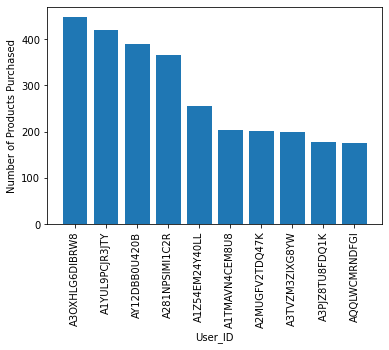

In [45]:
plt.bar(user_10, no_10, label = 'most recommended users')
plt.xlabel('User_ID')
plt.ylabel('Number of Products Purchased')
plt.xticks(rotation = 'vertical')
plt.show()

---

In [46]:
#Analyse length of comments whether customers are going to give lengthy comments or short

In [47]:
data.sample(n=2000)

Id   ProductId          UserId                ProfileName  \
564322  564323  B002YLGAIO   AYD0YJNKMF0FO                   C. Golla   
382210  382211  B0026LINFK  A1KA134GJK16VK                     JB-RRS   
487651  487652  B000GJQ5C2  A131T482HPX7KL                   violet g   
384537  384538  B008CTBK7S  A2CTA9LOIK9U2R           Sherrie Bradford   
161202  161203  B008O3G2K2  A12PN254PTSGU5           Contrary2 "Mary"   
...        ...         ...             ...                        ...   
28773    28774  B0002VXZ40  A3N7KOM9U1TXSZ        Aaronjon "Aaronjon"   
391147  391148  B005I2C7T2  A1K82R24ROO2I7         A. Cheffy "Cheffy"   
110280  110281  B002C0CSE2   AL18P2HL0Z9OK             Amanda jimenez   
66160    66161  B0007A0AQW   A30FQ39RJM7SM                  dog lover   
81256    81257  B0030VBSBG  A3CV7TZLXQGWA8  Shanda R. Kramer "Shanda"   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
564322                     1                       1      4  1300492800   
382210                     1                       2      5  1321747200   
487651                     5                       7      4  1184889600   
384537                     0                       0      5  1342569600   
161202                     1                       2      4  1318204800   
...                      ...                     ...    ...         ...   
28773                      1                       1      4  1275091200   
391147                     0                       0      4  1346025600   
110280                     0                       0      5  1315353600   
66160                      1                       1      5  1315267200   
81256                     37                      41      3  1299888000   

                                                  Summary  \
564322                              just like the theatre   
382210                                 My dogs love them!   
487651                                              Great   
384537                          I can eat it with a spoon   
161202               Interesting way to "treat" your dog!   
...                                                   ...   
28773                                Wasabi Pea Addiction   
391147              A bit bland but great in smoothies...   
110280  this is very good but the other flavored ones ...   
66160                         My dogs loved these treats!   
81256        Taste great, but second ingredient is SUGAR!   

                                                     Text  Polarity  
564322  The butter flavored season salt taste just lik...  0.000000  
382210  Up until recently I have had 4 dogs. Sadly, on...  0.625000  
487651  We picked up three of the small cakes in the B...  0.800000  
384537  This is fantastic. If it's really 85% less cal...  0.000000  
161202  I have to say this is an unusual product.  It'...  0.625000  
...                                                   ...       ...  
28773   I have a Wasabi Pea addiction. Its not pretty,...  0.000000  
391147  This is definitely not comparable to having fr...  0.316667  
110280  Columbian is great. It used to be in the groce...  0.392500  
66160   I highly recommend these dog treats!! Both of ...  0.875000  
81256   These are very good tasting and when I gave a ...  0.400000  

[2000 rows x 11 columns]

In [48]:
final=data[0:2000]

In [49]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Polarity  
0       0.7  
1       0.0  
2       0.0  
3       0.0  
4       0.8

In [50]:
final.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Polarity                  0
dtype: int64

In [51]:
final.duplicated().sum()

0

In [52]:
len(final['Text'][0].split(' '))

49

In [53]:
def calc_len(text):
    return len(text.split(' '))

In [54]:
final['text_length'] = final['Text'].apply(calc_len)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [55]:
import plotly.express as px

In [56]:
px.box(final, y = 'text_length')

In [57]:
#Analysing score

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Score', ylabel='count'>

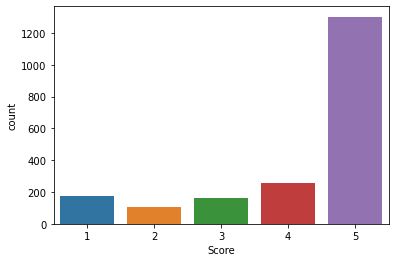

In [58]:
sns.countplot(final['Score'])

---

In [59]:
#Analyse the behaviour of customers

In [60]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Polarity  text_length  
0       0.7           49  
1       0.0           31  
2       0.0           99  
3       0.0           43  
4       0.8           30

In [61]:
final['Text'] = final['Text'].str.lower()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
final['Text'][164]

'seriously this product was as tasteless as they come. there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. you just have to season it or combine it with something else to share the flavor.'

In [63]:
re.sub('[^a-zA-Z]', ' ',final['Text'][164])

'seriously this product was as tasteless as they come  there are much better tasting products out there but at     calories its better than a special k bar or cookie snack pack  you just have to season it or combine it with something else to share the flavor '

In [64]:
punctuation = '''!()-{}[]:;"/<>?\@#$%*_'''

data=final['Text'][164]
no_punc=''
for char in data:
    if char not in punctuation:
        no_punc= no_punc + char
no_punc

'seriously this product was as tasteless as they come. there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. you just have to season it or combine it with something else to share the flavor.'

In [65]:
import string
punctuation = string.punctuation

def remove_punc(review):
    no_punc=''
    for char in review:
        if char not in punctuation:
            no_punc= no_punc + char
    return no_punc

In [66]:
final['Text'] = final['Text'].apply(remove_punc)

In [67]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  i have bought several of the vitality canned d...   
1      Not as Advertised  product arrived labeled as jumbo salted peanut...   
2  "Delight" says it all  this is a confection that has been around a fe...   
3         Cough Medicine  if you are looking for the secret ingredient i...   
4            Great taffy  great taffy at a great price  there was a wide...   

   Polarity  text_length  
0       0.7           49  
1       0.0           31  
2       0.0           99  
3       0.0           43  
4       0.8           30

In [68]:
final['Text'][164]

'seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

In [69]:
import nltk
from nltk.corpus import stopwords

In [70]:
review='seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

In [71]:
re2=[word for word in review.split(' ') if word not in set(stopwords.words('english'))]
str=''
for wd in re2:
    str=str+wd
    str=str+' '
str

'seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor '

In [72]:
re2=[word for word in review.split(' ') if word not in set(stopwords.words('english'))]
' '.join(re2)

'seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor'

In [73]:
def remove_stopwords(review):
    return ' '.join([word for word in review.split(' ') if word not in set(stopwords.words('english'))])

In [74]:
final['Text'] = final['Text'].apply(remove_stopwords)

In [75]:
final['Text'][45]

'seems little wholesome supermarket brands somewhat mushy doesnt quite much flavor either  didnt pass muster kids probably wont buy'

---

In [76]:
final['Text'].str.contains('http?').sum()

35

In [77]:
pd.set_option('display.max_rows', 2000)
final['Text'].str.contains('http?')

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21       True
22      False
23      False
24      False
25       True
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39       True
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [81]:
review =final['Text'][21]
review

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price hrefhttpwwwamazoncomgpproductb001gvisjmtwizzlers strawberry 16ounce bags pack 6a'

In [79]:
import re

In [82]:
url_pattern = re.compile(r'href|http.\w+')
url_pattern.sub(r'', review)

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price  strawberry 16ounce bags pack 6a'

In [83]:
def remove_urls(review):
    url_pattern = re.compile(r'href|http.\w+')
    return url_pattern.sub(r'', review)

In [84]:
final['Text'] = final['Text'].apply(remove_urls)

In [86]:
final['Text'][25]

'product received advertisedbr br  strawberry 16ounce bags pack 6a'

In [87]:
final['Text'].str.contains('http').sum()

0

In [88]:
final['Text'][25].replace('br', '')

'product received advertised   strawberry 16ounce bags pack 6a'

In [98]:
for i in range (len(final['Text'])):
    final['Text'][i] = final['Text'][i].replace('br', '')

' '.join(final['Text'])

<ipython-input-98-9583cb93b342>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'bought several vitality canned dog food products found good quality product looks like stew processed meat smells better laador finicky appreciates product better  product arrived labeled jumbo salted peanutsthe peanuts actually small sized unsalted sure error vendor intended represent product jumbo confection around centuries  light pillowy citrus gelatin nuts  case filberts cut tiny squares liberally coated powdered sugar  tiny mouthful heaven  chewy flavorful  highly recommend yummy treat  familiar story cs lewis lion witch wardrobe  treat seduces edmund selling other sisters witch looking secret ingredient robitussin believe found  got addition root beer extract ordered good made cherry soda  flavor medicinal great taffy great price  wide assortment yummy taffy  delivery quick  taffy lover deal got wild hair taffy ordered five pound bag taffy enjoyable many flavors watermelon root beer melon peppermint grape etc complaint bit much redblack licoriceflavored pieces particular favori

In [99]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  bought several vitality canned dog food produc...   
1      Not as Advertised  product arrived labeled jumbo salted peanutsth...   
2  "Delight" says it all  confection around centuries  light pillowy cit...   
3         Cough Medicine  looking secret ingredient robitussin believe f...   
4            Great taffy  great taffy great price  wide assortment yummy...   

   Polarity  text_length  
0       0.7           49  
1       0.0           31  
2       0.0           99  
3       0.0           43  
4       0.8           30

In [100]:
comment_words = ' '.join(final['Text'])

In [101]:
stopwords=set(STOPWORDS)

(-0.5, 799.5, 799.5, -0.5)

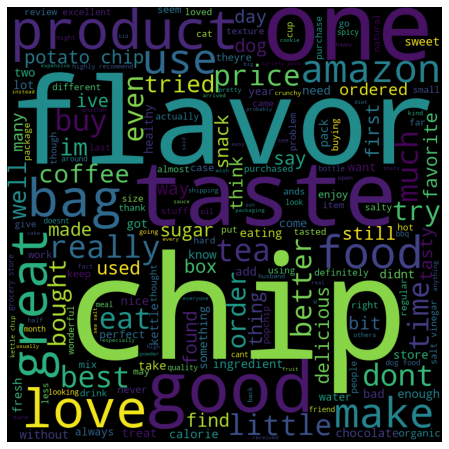

In [102]:
wordcloud2 = WordCloud(width = 800, height = 800, stopwords = stopwords).generate(comment_words)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')